# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [6]:
# Your code here! :)
data = pd.read_csv("./data/GermanCredit.csv")

In [7]:
data.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Duration                                1000 non-null   int64 
 1   Amount                                  1000 non-null   int64 
 2   InstallmentRatePercentage               1000 non-null   int64 
 3   ResidenceDuration                       1000 non-null   int64 
 4   Age                                     1000 non-null   int64 
 5   NumberExistingCredits                   1000 non-null   int64 
 6   NumberPeopleMaintenance                 1000 non-null   int64 
 7   Telephone                               1000 non-null   int64 
 8   ForeignWorker                           1000 non-null   int64 
 9   Class                                   1000 non-null   object
 10  CheckingAccountStatus.lt.0              1000 non-null   int64 
 11  Check

In [12]:
data['Class']

0      Good
1       Bad
2      Good
3      Good
4       Bad
       ... 
995    Good
996    Good
997    Good
998     Bad
999    Good
Name: Class, Length: 1000, dtype: object

In [131]:
y = data.Class

In [18]:
X = data.drop('Class',1)

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 61 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Duration                                1000 non-null   int64
 1   Amount                                  1000 non-null   int64
 2   InstallmentRatePercentage               1000 non-null   int64
 3   ResidenceDuration                       1000 non-null   int64
 4   Age                                     1000 non-null   int64
 5   NumberExistingCredits                   1000 non-null   int64
 6   NumberPeopleMaintenance                 1000 non-null   int64
 7   Telephone                               1000 non-null   int64
 8   ForeignWorker                           1000 non-null   int64
 9   CheckingAccountStatus.lt.0              1000 non-null   int64
 10  CheckingAccountStatus.0.to.200          1000 non-null   int64
 11  CheckingAccountSta

In [22]:
y = y.to_frame()

In [23]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=23)

In [40]:
dtc = DecisionTreeClassifier()

In [38]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 954 to 860
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   700 non-null    object
dtypes: object(1)
memory usage: 10.9+ KB


In [41]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
y_pred = dtc.predict(X_test)

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         Bad       0.50      0.53      0.52        94
        Good       0.78      0.76      0.77       206

    accuracy                           0.69       300
   macro avg       0.64      0.64      0.64       300
weighted avg       0.69      0.69      0.69       300



In [63]:
param = {
    "criterion":['gini','entropy'],
    "max_depth": range(1,5),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
    }

In [64]:
grid = GridSearchCV(dtc, param_grid = param, cv=10, verbose=1, n_jobs=-1)

In [65]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


c:\program files\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
320 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "c:\program files\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\program files\python37\lib\site-packages\sklearn\tree\_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "c:\program files\python37\lib\site-packages\sklearn\tree\_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer gre

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 5),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [66]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [67]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_split=3)

In [265]:
dtc_accuracy = grid.best_score_
print(dtc_accuracy)

0.7214285714285715


### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [53]:
! pip install dtreeviz

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for dtreeviz, since package 'wheel' is not installed.
    Running setup.py install for dtreeviz: started
    Running setup.py install for dtreeviz: finished with status 'done'


In [82]:
from sklearn import tree
from dtreeviz.trees import *

In [89]:
feature_names = X.columns.to_frame()
type(feature_names)

pandas.core.frame.DataFrame

In [96]:
data.Class.unique()

array(['Good', 'Bad'], dtype=object)

In [115]:
X.columns.values

array(['Duration', 'Amount', 'InstallmentRatePercentage',
       'ResidenceDuration', 'Age', 'NumberExistingCredits',
       'NumberPeopleMaintenance', 'Telephone', 'ForeignWorker',
       'CheckingAccountStatus.lt.0', 'CheckingAccountStatus.0.to.200',
       'CheckingAccountStatus.gt.200', 'CheckingAccountStatus.none',
       'CreditHistory.NoCredit.AllPaid', 'CreditHistory.ThisBank.AllPaid',
       'CreditHistory.PaidDuly', 'CreditHistory.Delay',
       'CreditHistory.Critical', 'Purpose.NewCar', 'Purpose.UsedCar',
       'Purpose.Furniture.Equipment', 'Purpose.Radio.Television',
       'Purpose.DomesticAppliance', 'Purpose.Repairs',
       'Purpose.Education', 'Purpose.Vacation', 'Purpose.Retraining',
       'Purpose.Business', 'Purpose.Other', 'SavingsAccountBonds.lt.100',
       'SavingsAccountBonds.100.to.500',
       'SavingsAccountBonds.500.to.1000', 'SavingsAccountBonds.gt.1000',
       'SavingsAccountBonds.Unknown', 'EmploymentDuration.lt.1',
       'EmploymentDuration.1.to.4

In [151]:
y = data.Class

In [152]:
yframe = y.to_frame()

In [163]:
y.dtypes

dtype('O')

In [166]:
yframe.dtypes

Class    object
dtype: object

In [169]:
from sklearn.preprocessing import LabelEncoder

In [170]:
le = LabelEncoder()

In [172]:
le.fit(y)

LabelEncoder()

In [173]:
y_val = le.transform(y)

If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

In [185]:
X.shape

(1000, 61)

In [190]:
X_arr = np.array(X)

In [191]:
X_flat = X_arr.flatten()

In [194]:
np.shape(X_flat)

(61000,)

In [195]:
X_flat

array([   6, 1169,    4, ...,    0,    1,    0], dtype=int64)

ValueError: x must have 2 or fewer dimensions

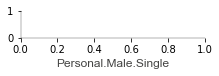

In [240]:
# Your code here! :)
viz = dtreeviz(dtc, X, y_val, target_name='Class',
               feature_names=feature_cols,
               class_names=["Good","Bad"])

#### Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [198]:
from sklearn.ensemble import RandomForestClassifier

In [210]:
rfc = RandomForestClassifier(random_state = 23)

In [212]:
y_train = np.ravel(y_train)

In [213]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=23)

In [262]:
y_pred_rfc = rfc.predict(X_test)

In [263]:
from sklearn.metrics import accuracy_score
rfc_accuracy = accuracy_score(y_test, y_pred)

In [264]:
print(rfc_accuracy)

0.76


As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

In [223]:
feature_cols = ['Duration','Amount', 'InstallmentRatePercentage', 'ResidenceDurationb', 'Age', 'NumberExistingCredits', 'NumberPeopleMaintenance', 'Telephone', 'ForeignWorker', 'CheckingAccountStatus.lt.0', 'CheckingAccountStatus.0.to.200', 'CheckingAccountStatus.gt.200', 'CheckingAccountStatus.none', 'CreditHistory.NoCredit.AllPaid', 'CreditHistory.ThisBank.AllPaid', 'CreditHistory.PaidDuly', 'CreditHistory.Delay', 'CreditHistory.Critical', 'Purpose.NewCar', 'Purpose.UsedCar', 'Purpose.Furniture.Equipment', 'Purpose.Radio.Television', 'Purpose.DomesticAppliance', 'Purpose.Repairs', 'Purpose.Education', 'Purpose.Vacation', 'Purpose.Retraining', 'Purpose.Business', 'Purpose.Other', 'SavingsAccountBonds.lt.100', 'SavingsAccountBonds.100.to.500', 'SavingsAccountBonds.500.to.1000', 'SavingsAccountBonds.gt.1000', 'SavingsAccountBonds.Unknown', 'EmploymentDuration.lt.1', 'EmploymentDuration.1.to.4', 'EmploymentDuration.4.to.7', 'EmploymentDuration.gt.7', 'EmploymentDuration.Unemployed', 'Personal.Male.Divorced.Seperated', 'Personal.Female.NotSingle', 'Personal.Male.Single', 'Personal.Male.Married.Widowed', 'Personal.Female.Single', 'OtherDebtorsGuarantors.None', 'OtherDebtorsGuarantors.CoApplicant', 'OtherDebtorsGuarantors.Guarantor', 'Property.RealEstate', 'Property.Insurance', 'Property.CarOther', 'Property.Unknown', 'OtherInstallmentPlans.Bank', 'OtherInstallmentPlans.Stores', 'OtherInstallmentPlans.None', 'Housing.Rent', 'Housing.Own', 'Housing.ForFree', 'Job.UnemployedUnskilled', 'Job.UnskilledResident', 'Job.SkilledEmployee','Job.Management.SelfEmp.HighlyQualified']

In [242]:
rfc.feature_importances_

array([0.07214993, 0.09716283, 0.036884  , 0.03250149, 0.07636641,
       0.01730121, 0.01109291, 0.01676127, 0.00481011, 0.03908316,
       0.01904552, 0.00917444, 0.05708178, 0.00579909, 0.01506235,
       0.01371245, 0.00727046, 0.01723189, 0.02083737, 0.00870531,
       0.01146367, 0.01366212, 0.00294012, 0.0039278 , 0.00779306,
       0.        , 0.0005838 , 0.01098937, 0.00177879, 0.01926414,
       0.0103264 , 0.0047701 , 0.00381633, 0.01620923, 0.016893  ,
       0.01506006, 0.01190308, 0.01297867, 0.01080231, 0.00921071,
       0.01635598, 0.01737923, 0.0088918 , 0.        , 0.00895275,
       0.00706595, 0.00781859, 0.01388952, 0.0128908 , 0.01276963,
       0.01222959, 0.01497316, 0.00632204, 0.02226863, 0.01245364,
       0.01468799, 0.00782789, 0.0029527 , 0.01053948, 0.01383587,
       0.01348798])

<AxesSubplot:>

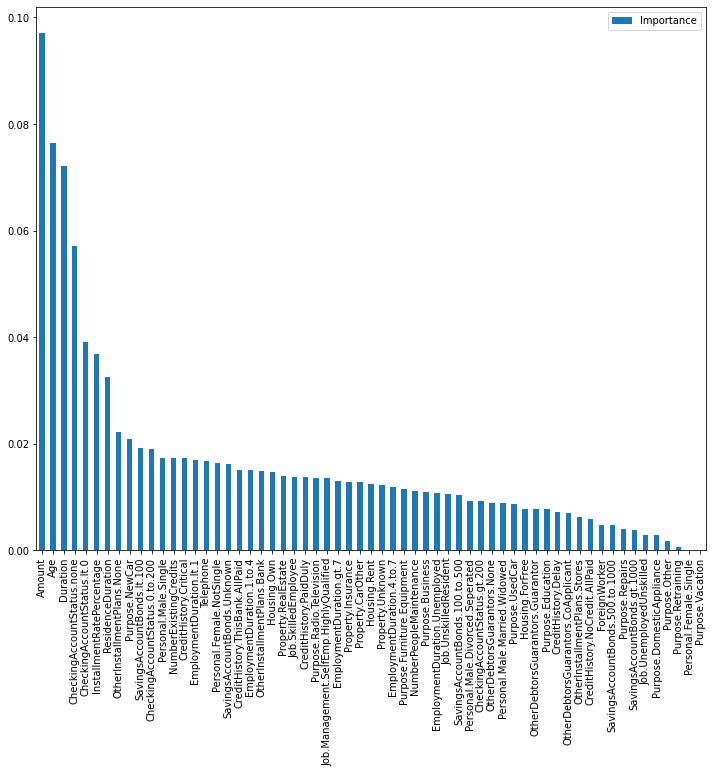

In [243]:
# Your code here
feat_importance = pd.DataFrame(rfc.feature_importances_, index=feature_cols, columns=["Importance"])
feat_importance.sort_values(by='Importance', ascending=False, inplace=True)
feat_importance.plot(kind='bar', figsize=(12,10))

A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [232]:
! pip install --user pdpbox


  Using cached PDPbox-0.2.1.tar.gz (34.0 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached matplotlib-3.1.1-cp37-cp37m-win_amd64.whl (9.1 MB)
Using legacy 'setup.py install' for pdpbox, since package 'wheel' is not installed.
    Running setup.py install for pdpbox: started
    Running setup.py install for pdpbox: finished with status 'done'


While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_inter_ax': <AxesSubplot:xlabel='Amount', ylabel='Age'>})

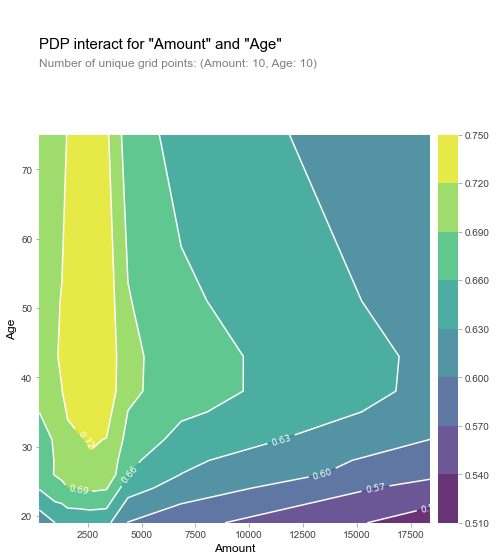

In [237]:
# Your code here!
from pdpbox import pdp
pdp_amount_age = pdp.pdp_interact(rfc, data, feature_cols, ['Amount','Age'])
pdp.pdp_interact_plot(pdp_amount_age, ['Amount','Age'], plot_type='contour', x_quantile=False, plot_pdp=False, which_classes=None, figsize=None, ncols=2, plot_params=None)

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <AxesSubplot:>,
  'pdp_inter_ax': <AxesSubplot:xlabel='Amount', ylabel='NumberExistingCredits'>})

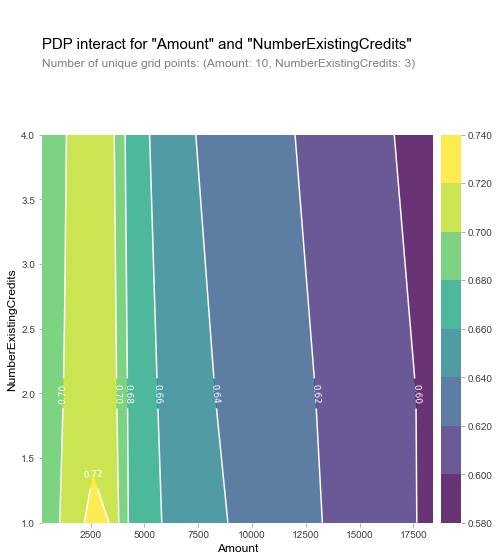

In [251]:
pdp_amount_NumberExistingCredits = pdp.pdp_interact(rfc, data, feature_cols, ['Amount','NumberExistingCredits'])
pdp.pdp_interact_plot(pdp_amount_NumberExistingCredits, ['Amount','NumberExistingCredits'], plot_type='contour', x_quantile=False, plot_pdp=False, which_classes=None, figsize=None, ncols=2, plot_params=None)

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [244]:
! conda install -c anaconda py-xgboost

'conda' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
! conda install -c conda-forge catboost

In [ ]:
! conda install -c conda-forge lightgbm

In [246]:
!pip install xgboost

In [248]:
!pip install catboost

In [249]:
!pip install lightgbm

  Using cached wheel-0.37.0-py2.py3-none-any.whl (35 kB)

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

In [252]:
import xgboost
from xgboost import XGBClassifier

In [253]:
from catboost import CatBoostClassifier

In [254]:
import lightgbm as lgb

In [266]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(xgb_accuracy)

[22:54:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7566666666666667


In [267]:
cat = CatBoostClassifier()
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)
cat_accuracy = accuracy_score(y_test, y_pred_cat)
print(cat_accuracy)

Learning rate set to 0.008847
0:	learn: 0.6886861	total: 2.97ms	remaining: 2.97s
1:	learn: 0.6849135	total: 6.66ms	remaining: 3.32s
2:	learn: 0.6806073	total: 9.58ms	remaining: 3.18s
3:	learn: 0.6763726	total: 12.4ms	remaining: 3.09s
4:	learn: 0.6723156	total: 15.8ms	remaining: 3.15s
5:	learn: 0.6688753	total: 18.8ms	remaining: 3.12s
6:	learn: 0.6655348	total: 22.2ms	remaining: 3.14s
7:	learn: 0.6621046	total: 25.2ms	remaining: 3.12s
8:	learn: 0.6598861	total: 28.9ms	remaining: 3.18s
9:	learn: 0.6566960	total: 31.8ms	remaining: 3.15s
10:	learn: 0.6532503	total: 35.4ms	remaining: 3.19s
11:	learn: 0.6501584	total: 37.8ms	remaining: 3.12s
12:	learn: 0.6467283	total: 41.2ms	remaining: 3.13s
13:	learn: 0.6432227	total: 44.2ms	remaining: 3.11s
14:	learn: 0.6403518	total: 47.5ms	remaining: 3.12s
15:	learn: 0.6375520	total: 50.8ms	remaining: 3.12s
16:	learn: 0.6343755	total: 53.9ms	remaining: 3.12s
17:	learn: 0.6313558	total: 57.1ms	remaining: 3.11s
18:	learn: 0.6288652	total: 60ms	remaining: 

163:	learn: 0.4421869	total: 590ms	remaining: 3.01s
164:	learn: 0.4415515	total: 594ms	remaining: 3s
165:	learn: 0.4407625	total: 598ms	remaining: 3s
166:	learn: 0.4400895	total: 603ms	remaining: 3s
167:	learn: 0.4394411	total: 607ms	remaining: 3.01s
168:	learn: 0.4393852	total: 609ms	remaining: 2.99s
169:	learn: 0.4388148	total: 612ms	remaining: 2.99s
170:	learn: 0.4383355	total: 616ms	remaining: 2.99s
171:	learn: 0.4376057	total: 619ms	remaining: 2.98s
172:	learn: 0.4370956	total: 623ms	remaining: 2.98s
173:	learn: 0.4363759	total: 627ms	remaining: 2.97s
174:	learn: 0.4357789	total: 630ms	remaining: 2.97s
175:	learn: 0.4351818	total: 633ms	remaining: 2.96s
176:	learn: 0.4344578	total: 636ms	remaining: 2.96s
177:	learn: 0.4338158	total: 640ms	remaining: 2.96s
178:	learn: 0.4333352	total: 643ms	remaining: 2.95s
179:	learn: 0.4328385	total: 647ms	remaining: 2.94s
180:	learn: 0.4323535	total: 650ms	remaining: 2.94s
181:	learn: 0.4316480	total: 653ms	remaining: 2.94s
182:	learn: 0.4310577

327:	learn: 0.3623447	total: 1.19s	remaining: 2.43s
328:	learn: 0.3618242	total: 1.19s	remaining: 2.43s
329:	learn: 0.3614239	total: 1.19s	remaining: 2.42s
330:	learn: 0.3610370	total: 1.2s	remaining: 2.42s
331:	learn: 0.3605319	total: 1.2s	remaining: 2.41s
332:	learn: 0.3601104	total: 1.2s	remaining: 2.41s
333:	learn: 0.3595380	total: 1.21s	remaining: 2.4s
334:	learn: 0.3590068	total: 1.21s	remaining: 2.4s
335:	learn: 0.3585477	total: 1.21s	remaining: 2.4s
336:	learn: 0.3581383	total: 1.22s	remaining: 2.39s
337:	learn: 0.3578637	total: 1.22s	remaining: 2.39s
338:	learn: 0.3574853	total: 1.22s	remaining: 2.38s
339:	learn: 0.3572221	total: 1.23s	remaining: 2.38s
340:	learn: 0.3567922	total: 1.23s	remaining: 2.38s
341:	learn: 0.3564151	total: 1.23s	remaining: 2.37s
342:	learn: 0.3562621	total: 1.24s	remaining: 2.37s
343:	learn: 0.3560032	total: 1.24s	remaining: 2.37s
344:	learn: 0.3555835	total: 1.24s	remaining: 2.36s
345:	learn: 0.3551464	total: 1.25s	remaining: 2.36s
346:	learn: 0.3545

496:	learn: 0.3067372	total: 1.79s	remaining: 1.81s
497:	learn: 0.3064748	total: 1.79s	remaining: 1.8s
498:	learn: 0.3062737	total: 1.79s	remaining: 1.8s
499:	learn: 0.3060783	total: 1.79s	remaining: 1.79s
500:	learn: 0.3058322	total: 1.8s	remaining: 1.79s
501:	learn: 0.3055718	total: 1.8s	remaining: 1.79s
502:	learn: 0.3052573	total: 1.8s	remaining: 1.78s
503:	learn: 0.3049189	total: 1.81s	remaining: 1.78s
504:	learn: 0.3047694	total: 1.81s	remaining: 1.77s
505:	learn: 0.3044786	total: 1.81s	remaining: 1.77s
506:	learn: 0.3041426	total: 1.82s	remaining: 1.77s
507:	learn: 0.3038787	total: 1.82s	remaining: 1.76s
508:	learn: 0.3036762	total: 1.82s	remaining: 1.76s
509:	learn: 0.3034988	total: 1.83s	remaining: 1.75s
510:	learn: 0.3032676	total: 1.83s	remaining: 1.75s
511:	learn: 0.3030299	total: 1.83s	remaining: 1.75s
512:	learn: 0.3028353	total: 1.84s	remaining: 1.74s
513:	learn: 0.3026006	total: 1.84s	remaining: 1.74s
514:	learn: 0.3023327	total: 1.84s	remaining: 1.74s
515:	learn: 0.302

687:	learn: 0.2585187	total: 2.54s	remaining: 1.15s
688:	learn: 0.2582896	total: 2.54s	remaining: 1.15s
689:	learn: 0.2578018	total: 2.54s	remaining: 1.14s
690:	learn: 0.2574816	total: 2.54s	remaining: 1.14s
691:	learn: 0.2572520	total: 2.55s	remaining: 1.13s
692:	learn: 0.2570913	total: 2.55s	remaining: 1.13s
693:	learn: 0.2568684	total: 2.55s	remaining: 1.13s
694:	learn: 0.2566607	total: 2.56s	remaining: 1.12s
695:	learn: 0.2563834	total: 2.56s	remaining: 1.12s
696:	learn: 0.2561601	total: 2.56s	remaining: 1.11s
697:	learn: 0.2559912	total: 2.57s	remaining: 1.11s
698:	learn: 0.2555479	total: 2.57s	remaining: 1.11s
699:	learn: 0.2552046	total: 2.58s	remaining: 1.1s
700:	learn: 0.2550261	total: 2.58s	remaining: 1.1s
701:	learn: 0.2548992	total: 2.59s	remaining: 1.1s
702:	learn: 0.2546219	total: 2.59s	remaining: 1.09s
703:	learn: 0.2543362	total: 2.59s	remaining: 1.09s
704:	learn: 0.2540911	total: 2.6s	remaining: 1.09s
705:	learn: 0.2538215	total: 2.6s	remaining: 1.08s
706:	learn: 0.253

856:	learn: 0.2209167	total: 3.14s	remaining: 523ms
857:	learn: 0.2205333	total: 3.14s	remaining: 520ms
858:	learn: 0.2202126	total: 3.15s	remaining: 516ms
859:	learn: 0.2200128	total: 3.15s	remaining: 513ms
860:	learn: 0.2198516	total: 3.15s	remaining: 509ms
861:	learn: 0.2196225	total: 3.16s	remaining: 506ms
862:	learn: 0.2193648	total: 3.16s	remaining: 502ms
863:	learn: 0.2190456	total: 3.17s	remaining: 498ms
864:	learn: 0.2187752	total: 3.17s	remaining: 495ms
865:	learn: 0.2185217	total: 3.17s	remaining: 491ms
866:	learn: 0.2182813	total: 3.17s	remaining: 487ms
867:	learn: 0.2180567	total: 3.18s	remaining: 483ms
868:	learn: 0.2177963	total: 3.18s	remaining: 480ms
869:	learn: 0.2175401	total: 3.19s	remaining: 476ms
870:	learn: 0.2173074	total: 3.19s	remaining: 472ms
871:	learn: 0.2171018	total: 3.19s	remaining: 468ms
872:	learn: 0.2168369	total: 3.19s	remaining: 465ms
873:	learn: 0.2166349	total: 3.2s	remaining: 461ms
874:	learn: 0.2165060	total: 3.2s	remaining: 457ms
875:	learn: 0.

In [269]:
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
lgbm_accuracy = accuracy_score(y_test, y_pred_lgbm)
print(lgbm_accuracy)

0.76


In [270]:
accscore = {'Decision Tree':dtc_accuracy, 'Random Forest':rfc_accuracy, 'XGBoost':xgb_accuracy, 
            'CatBoost':cat_accuracy, 'LightGBM':lgbm_accuracy}

In [277]:
scores = pd.DataFrame(accscore, index=range(1,2))

In [278]:
print(scores)

   Decision Tree  Random Forest   XGBoost  CatBoost  LightGBM
1       0.721429           0.76  0.756667      0.76      0.76
